In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style='darkgrid')

### 데이터의 관계 표현
- Relational plots : 두 변수의 관계
- Distribution plots : 변수의 데이터 분포
- Categorical plots : 범주형 변수의 집계나 범주형 변수와 수치형 범주간의 관계

### Relational plots
- 두 변수의 관계를 나타낸다.

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Scatter plot

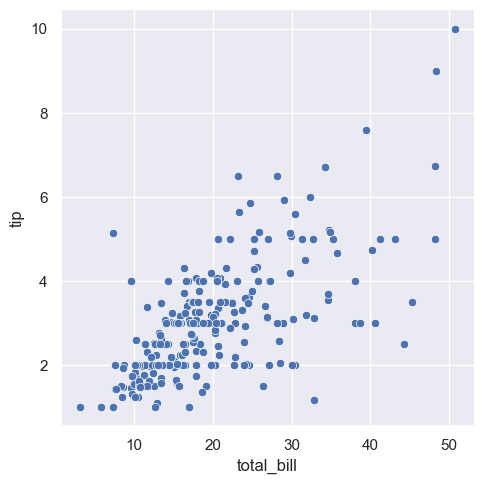

In [9]:
# 두 변수의 관계를 나타내는 산점도 
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter')

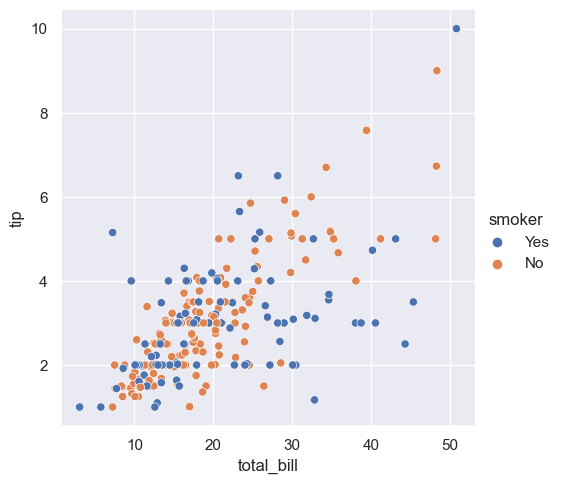

In [11]:
# hue는 색으로 변수를 표시해주며, 범주형 데이터도 가능하다. 
sns.relplot(data=tips, x="total_bill", y='tip', hue='smoker')

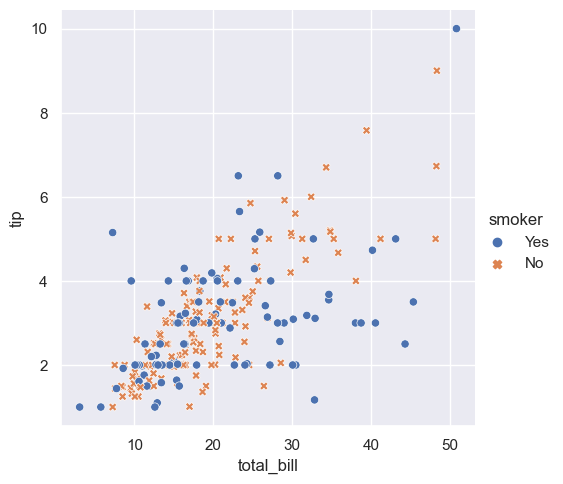

In [13]:
# 스타일 지정 
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

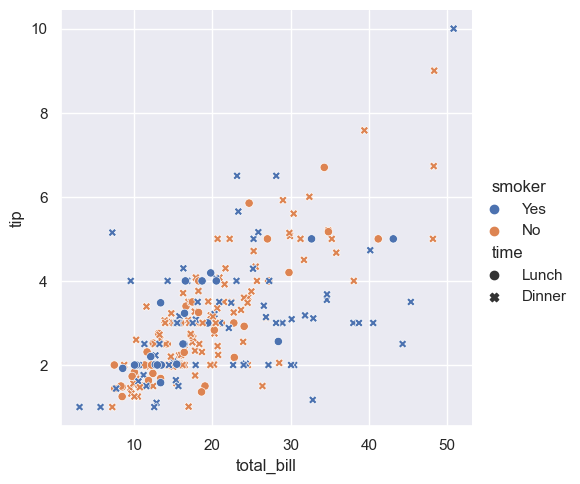

In [16]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time"
)

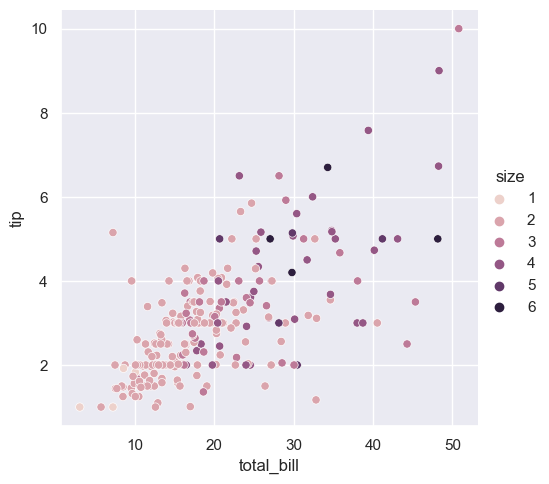

In [17]:
# 범주형 데이터가 아니더라도 hue에 할당할 수 있으며, 수치형은 색의 농도가 달라진다.  
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size"
)

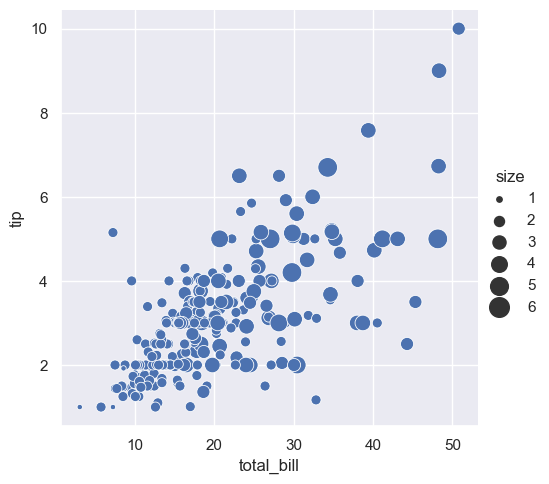

In [20]:
# 색상의 농도 뿐만 아니라 크기로도 수치를 구별할 수 있다. 
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

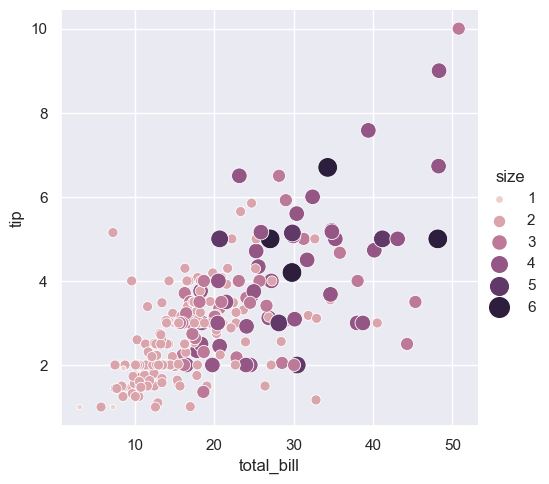

In [21]:
# 색상과 크기 차이를 한번에 표시할 수 있다. 
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
    size="size", sizes=(15, 200)
)

#### Line plot

In [22]:
fmri = sns.load_dataset("fmri")
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [23]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


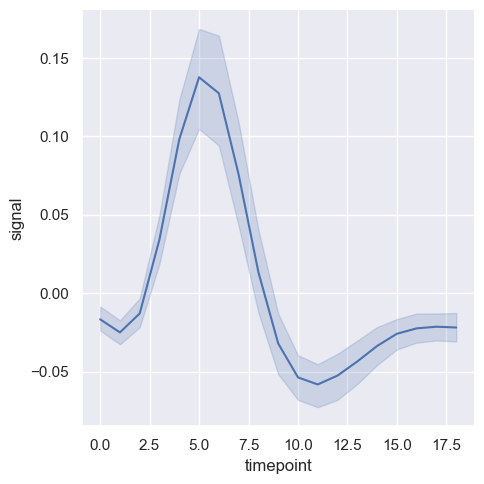

In [24]:
# 선 형태의 그래프 그리기
sns.relplot(
    data=fmri, x="timepoint", y="signal", kind="line"
)

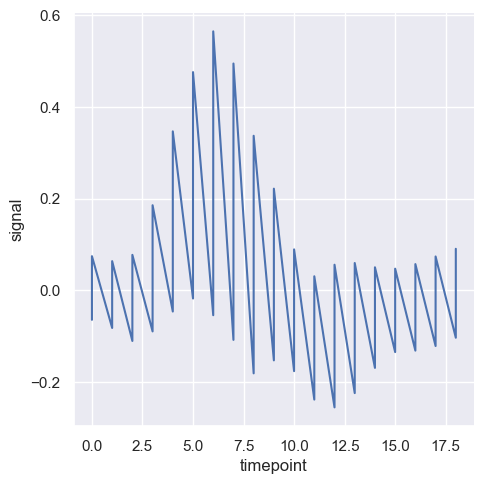

In [27]:
#estimator로 추정 회귀선(선 테두리)을 비활성화 할 수 있다. 
sns.relplot(
    data=fmri, kind="line", 
    x="timepoint", y="signal",
    estimator=None
)

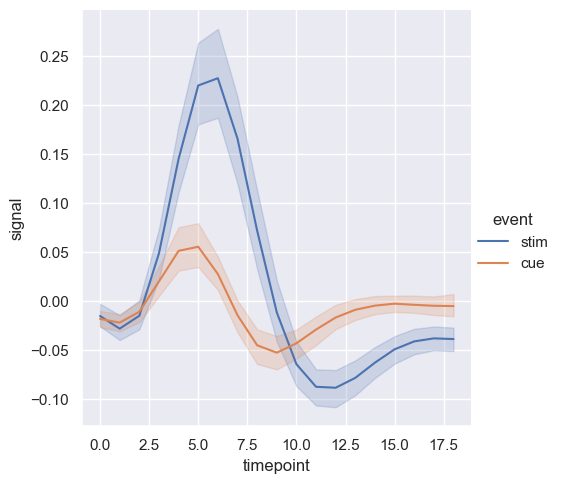

In [28]:
# hue에 범주형 데이터를 삽입할 수 있다. 
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event"
)

#### hue를 이용하여 하위 집합 분석
- hue : 색상으로 다르게 데이터 표현

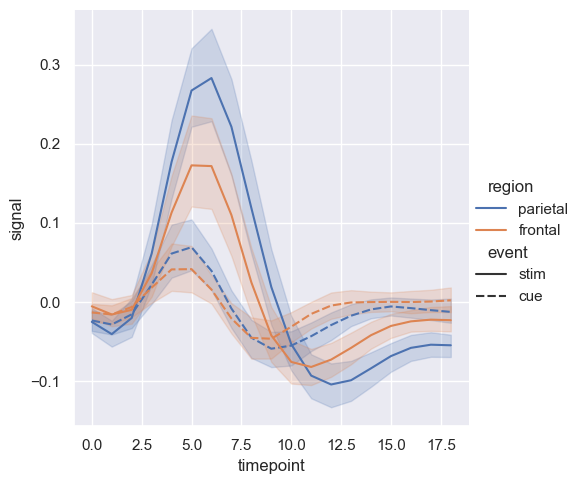

In [31]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event"
)

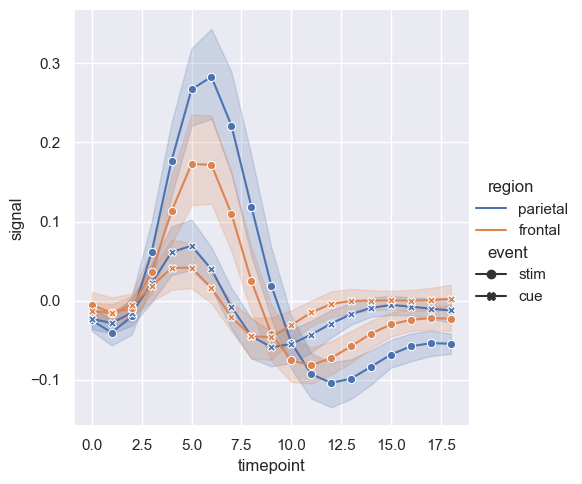

In [32]:
# 그래프에 dash를 없애고 marker를 추가한다. 
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True
)

#### 여러 관계 그래프

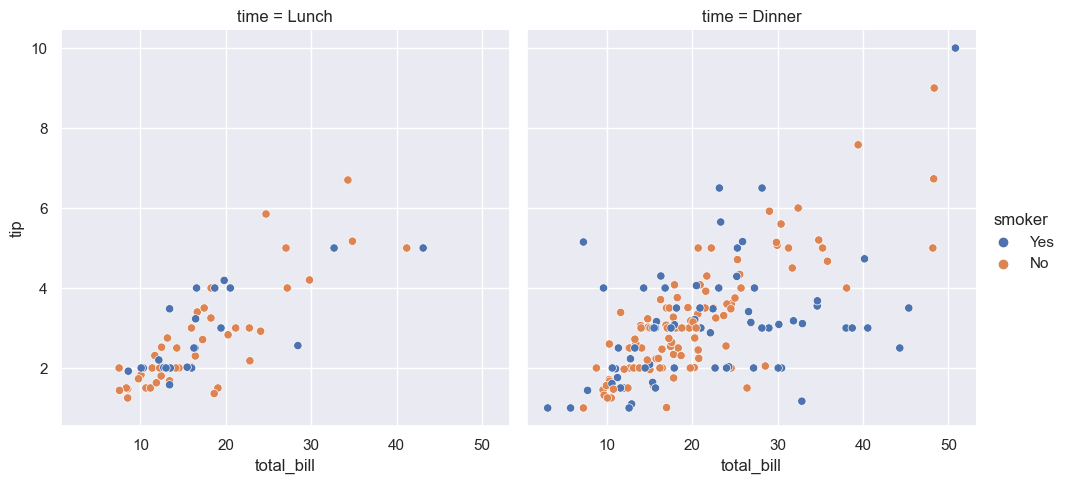

In [33]:
#col : 오른쪽에 그래프 추가 
sns.relplot(
    data=tips, 
    x="total_bill", y="tip", hue="smoker", col="time"
)

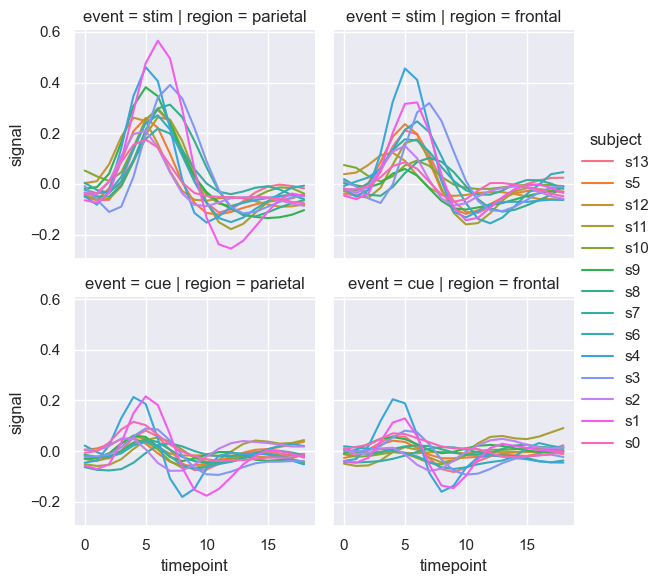

In [34]:
# row : 아래쪽에 그래프 추가
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

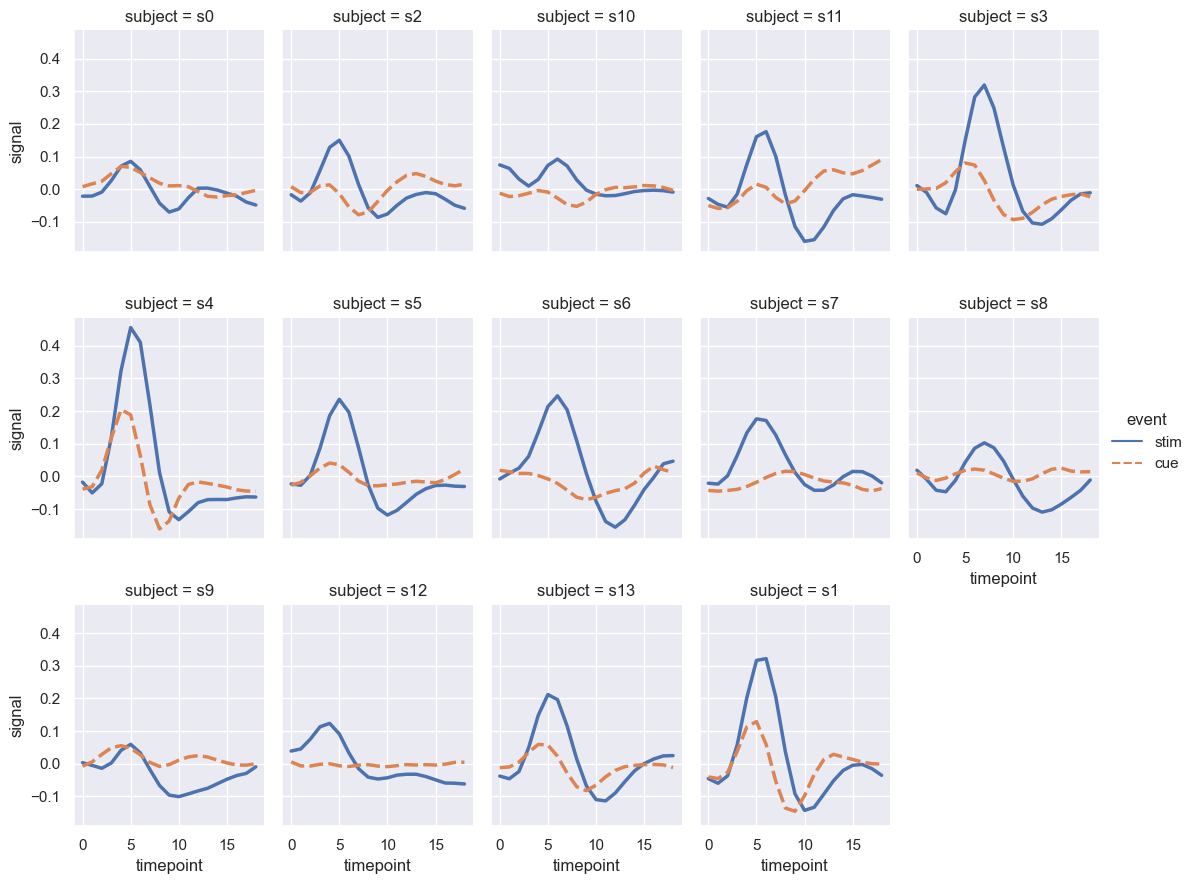

In [38]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5, # col_wrap으로 한 줄에 들어갈 그래프의 수를 지정
    height=3, aspect=.75, linewidth=2.5
)

### Distribution plots
- 변수의 데이터 분포를 나타낸다.

#### Hist plot

In [39]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [40]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


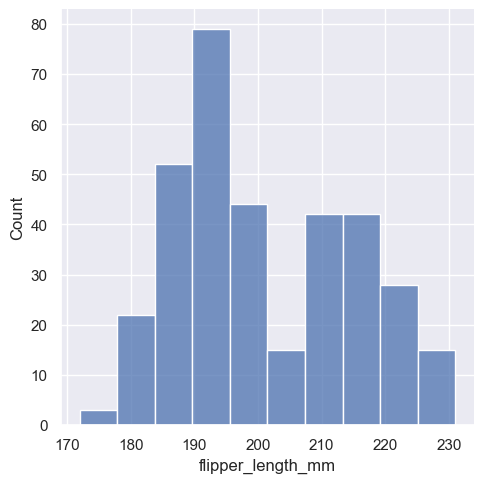

In [42]:
sns.displot(penguins, x="flipper_length_mm")

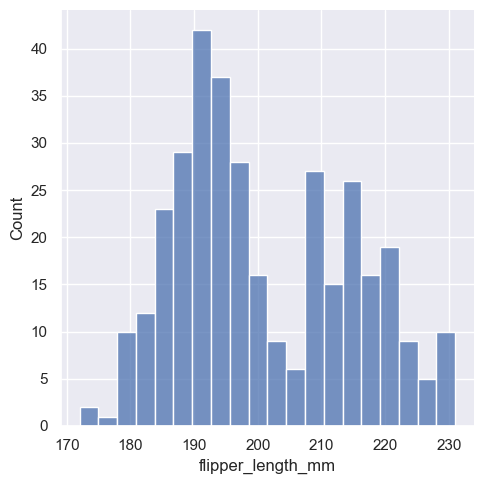

In [43]:
# bins로 가로축 구간의 개수 지정 
sns.displot(data=penguins, x="flipper_length_mm", bins=20)

##### hue를 이용한 정규화

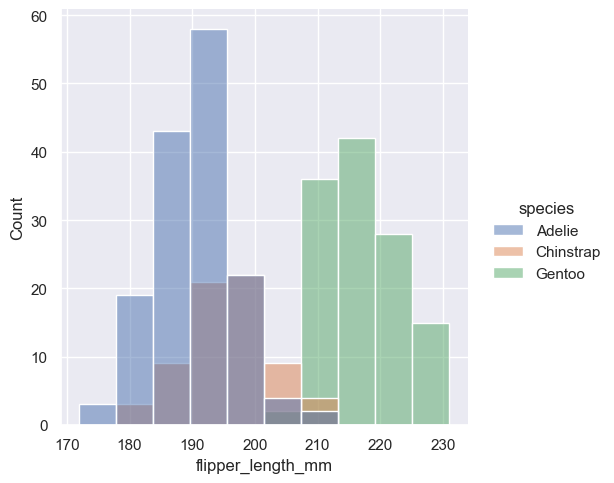

In [45]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species")

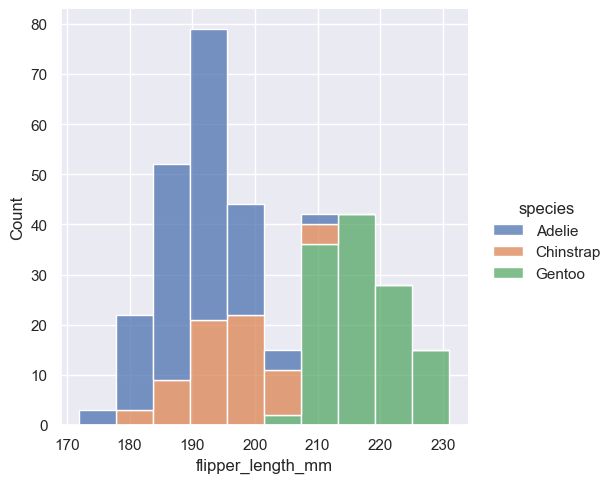

In [46]:
# stack을 이용하여 hue의 값을 쌓아서 표현한다. 
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

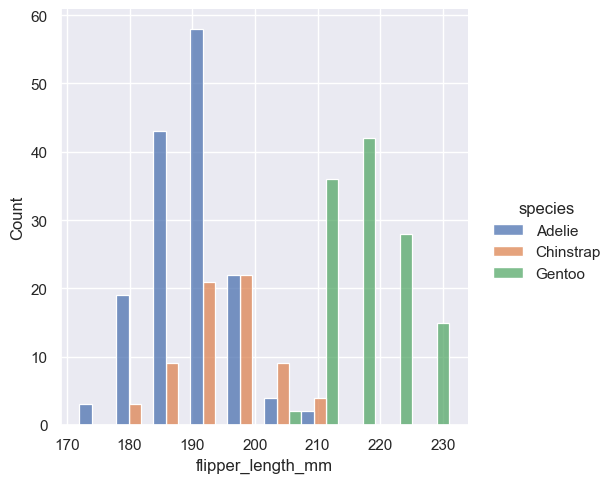

In [47]:
# dodge를 이용해 옆으로 늘어뜨려 표현할 수 있다. 
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

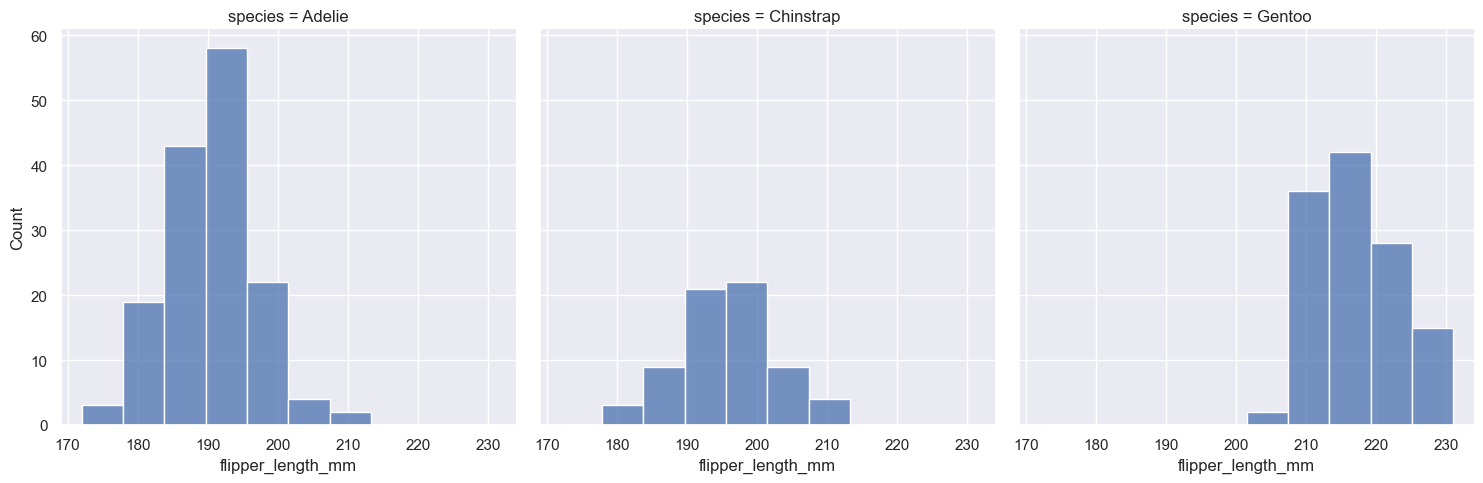

In [48]:
# 가로로 늘어뜨려 그래프를 분리할 수 있다.
sns.displot(penguins, x="flipper_length_mm", col="species")

##### stat을 이용한 정규화
- 하위 집합의 관측 수가 같지 않은 경우 개수 측면에서 분포를 비교하는 것이 이상적이지 않을 수 있다. 이런 경우 해결책으로 매개변수를 사용하여 카운트를 정규화 하는 것이다.

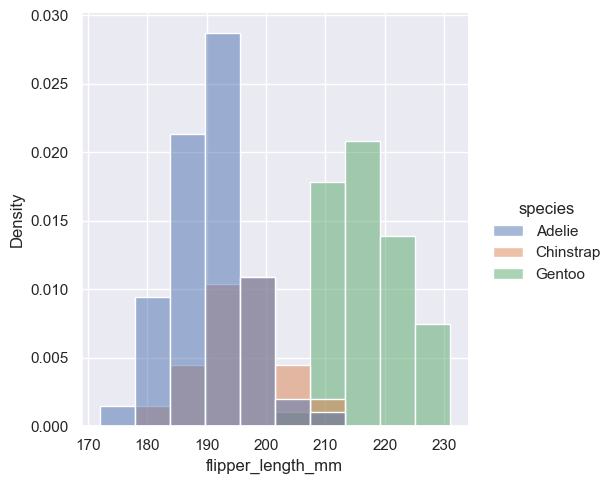

In [49]:
# density는 영역의 합이 1이 되도록 막대의 크기를 조정한다.
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

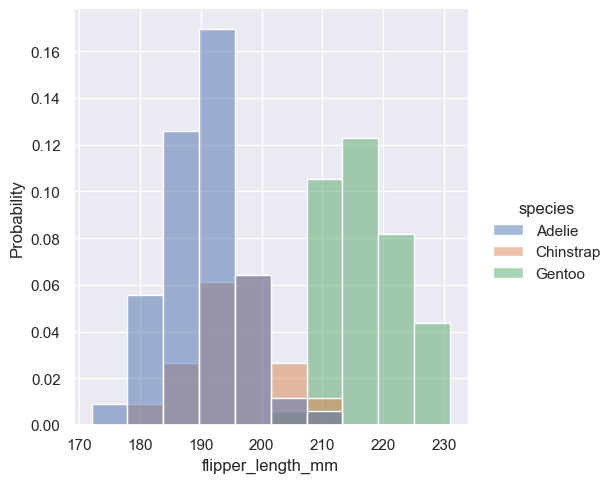

In [50]:
# probability는 높이의 합이 1이 되도록 정규화를 한다. 이것은 변수가 이산형일 때 가장 의미가 있습니다.
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

#### KDE plot
- 연속 밀도 추정치 표현

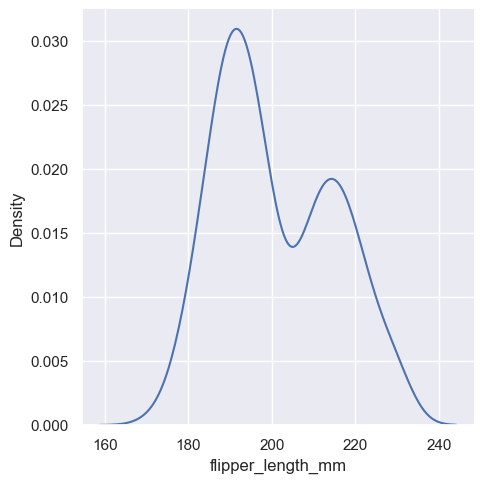

In [51]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

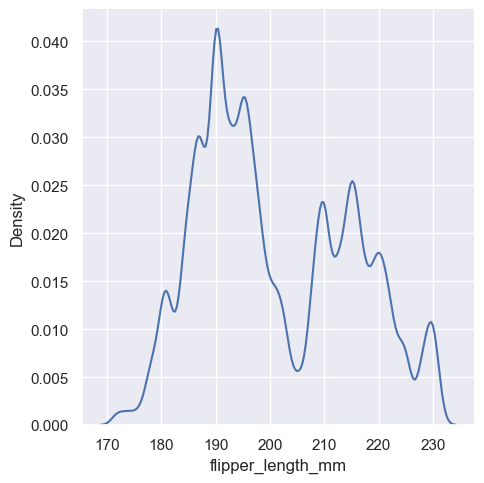

In [55]:
# bw_adjust는 bins와 비슷한 역할을 한다. 
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

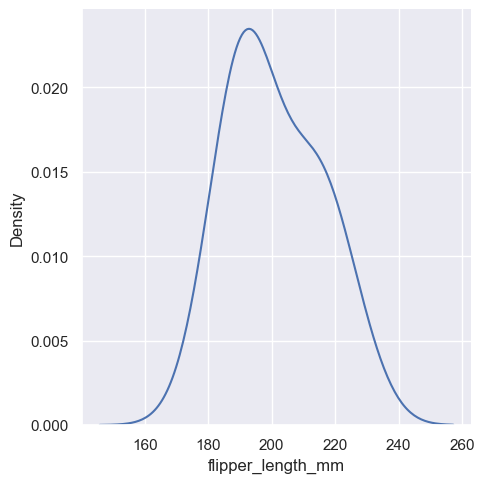

In [56]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

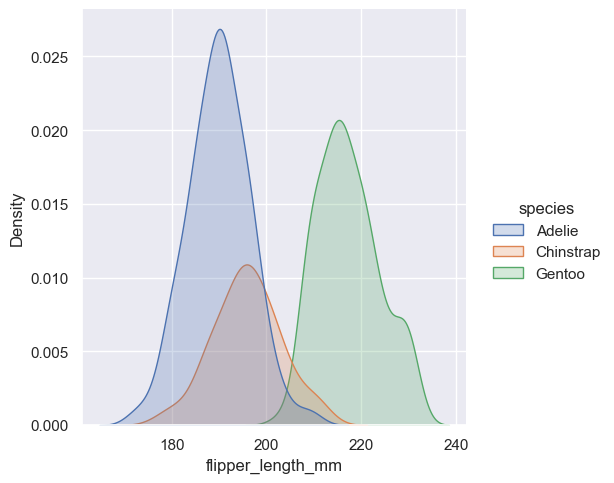

In [58]:
# fill을 True로 설정하면 그래프 내부가 채워진다.
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

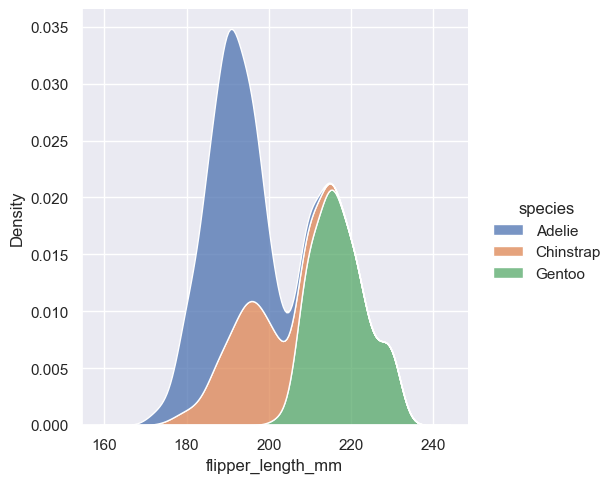

In [60]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

##### KDE 주의점
- 데이터가 매끄럽지 않은 경우에도 곡선으로 표현하기 떄문에 주의!

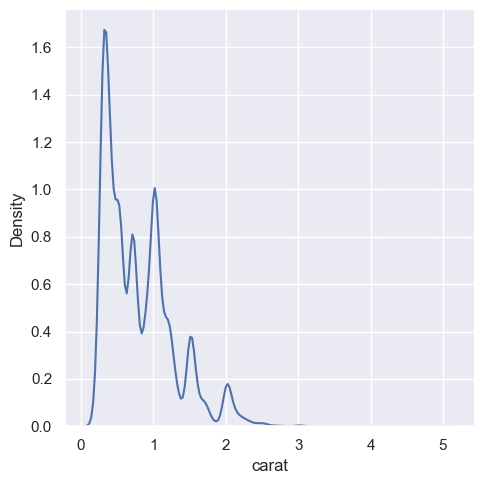

In [62]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

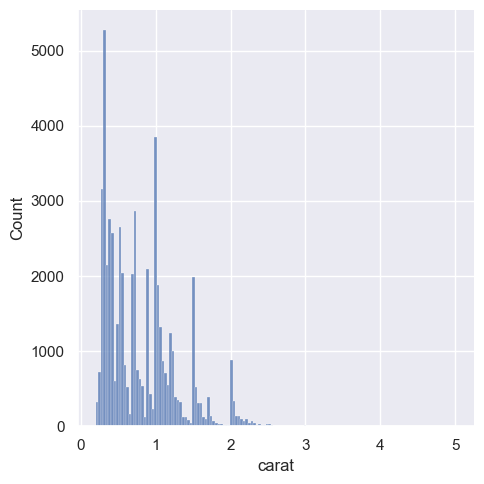

In [64]:
# 실제 데이터는 아래와 같은데 KDE가 왜곡했음을 알 수 있다.
sns.displot(diamonds, x="carat",)